In [1]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# import necessary packages to evaluate how models perform
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

In [2]:
# load the data
df = pd.read_csv('../input/creditcard-noduplicates/creditcard_noduplicates.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Define the explanatory variables
X = df.drop(['Class'], axis=1)

# Declare target variable
y = df['Class']

# I call StandardScaler to scale all the variables but the variables most important to scale are Time and Amount
# I also fit the scaler to the data and then transform it
X_scaled = StandardScaler().fit_transform(X)

# check to see data has been scaled
X_scaled

array([[-1.99682292, -0.70108232, -0.04168726, ...,  0.33303251,
        -0.06584955,  0.24419951],
       [-1.99682292,  0.60879165,  0.16413764, ..., -0.0271543 ,
         0.0432187 , -0.34258399],
       [-1.99680186, -0.7003364 , -0.81133678, ..., -0.14432548,
        -0.1838243 ,  1.15889967],
       ...,
       [ 1.64227757,  0.98235398, -0.18043304, ...,  0.00680174,
        -0.08264021, -0.0822395 ],
       [ 1.64227757, -0.12646526,  0.32465977, ...,  0.27052318,
         0.31700384, -0.31339058],
       [ 1.64236181, -0.27686005, -0.1127094 , ..., -0.01055821,
         0.03994074,  0.51329005]])

In [4]:
# Perform Random UnderSampling so their will be only 473 non-fraudulent transactions
rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_resample(X_scaled, y)
# Checks to see if we have an equal amount of fraudulent and non-fraudulent transactions
print(Counter(y_rus))
    
# Split original data and random undersampled data into training and test sets
X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus, y_rus, test_size=0.20)
    
# Only need to split the original data one time so we do it outside of the loop to help with data leakage
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20)

Counter({0: 473, 1: 473})


In [5]:
# Logistic Regression model (with first 5 different samples)
from sklearn import linear_model
logr = linear_model.LogisticRegression()


model_logr = logr.fit(X_rus_train, y_rus_train)

# Model makes its predictions
y_pred_logr = model_logr.predict(X_rus_test)
    
# print classification report so we can visually view the scores
print(classification_report(y_rus_test, y_pred_logr))    
    

print('The accuracy score is:', round(accuracy_score(y_rus_test, y_pred_logr), 4))
print('The precision score is:', round(precision_score(y_rus_test, y_pred_logr), 4))
print('The recall score is:', round(recall_score(y_rus_test, y_pred_logr), 4))
print('The f1_score over is:', round(f1_score(y_rus_test, y_pred_logr), 4))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        92
           1       0.98      0.93      0.95        98

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190

The accuracy score is: 0.9526
The precision score is: 0.9785
The recall score is: 0.9286
The f1_score over is: 0.9529


Below you will see visualizations of the results for the logistic regression model

1. Confusion Matrix
2. Receiver Operating Characteristic Curve
3. Model Coefficients
4. Decision Boundary

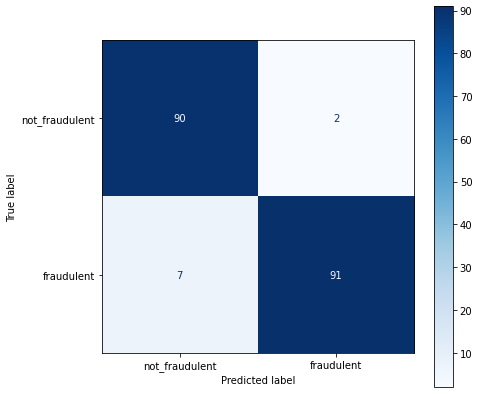

In [6]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 7,7

plot_confusion_matrix(model_logr, X_rus_test, y_rus_test, display_labels=['not_fraudulent', 'fraudulent'], cmap=plt.cm.Blues, normalize=None);

Above is the confusion matrix and this metric visualizes the results for the model and the numbers provided can be used to calculate the precision, recall, accuracy, f1-score identified above. Overall it can be seen that the model performs well. I want the model to predict fraudulent transactions correctly and it misclassified 7 out of 98 fraudulent transactions. This is something that I would want to continue to improve given more data.

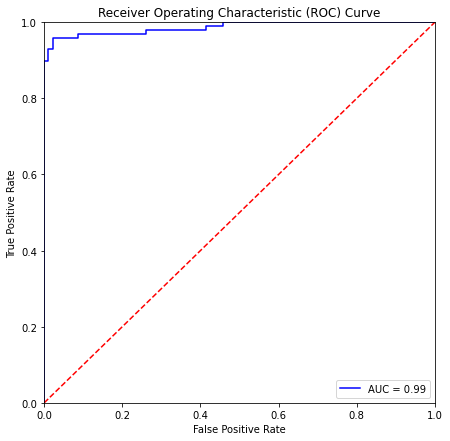

In [7]:
# Plot ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

probs = logr.predict_proba(X_rus_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_rus_test, preds)
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Above is the ROC curve. The curve is close to the top left hand corner so this tells us the model has great predictive power. The red dashed line represents a model that has no predictive power. The AUC score in the bottom right corner tells us the area under the curve represented as a percentage. The higher the score the better the model.

Feature: 0, Score: -0.15839
Feature: 1, Score: -0.07414
Feature: 2, Score: -0.18616
Feature: 3, Score: -0.12865
Feature: 4, Score: 1.08124
Feature: 5, Score: -0.07968
Feature: 6, Score: -0.25493
Feature: 7, Score: 0.21866
Feature: 8, Score: -0.30836
Feature: 9, Score: 0.09151
Feature: 10, Score: -0.13122
Feature: 11, Score: 0.02057
Feature: 12, Score: -0.46950
Feature: 13, Score: -0.40343
Feature: 14, Score: -0.73250
Feature: 15, Score: 0.01096
Feature: 16, Score: 0.04689
Feature: 17, Score: -0.01779
Feature: 18, Score: 0.15203
Feature: 19, Score: 0.05265
Feature: 20, Score: -0.11690
Feature: 21, Score: 0.04977
Feature: 22, Score: 0.25442
Feature: 23, Score: -0.23488
Feature: 24, Score: -0.04588
Feature: 25, Score: -0.06616
Feature: 26, Score: -0.03759
Feature: 27, Score: -0.11015
Feature: 28, Score: -0.10886
Feature: 29, Score: -0.10654


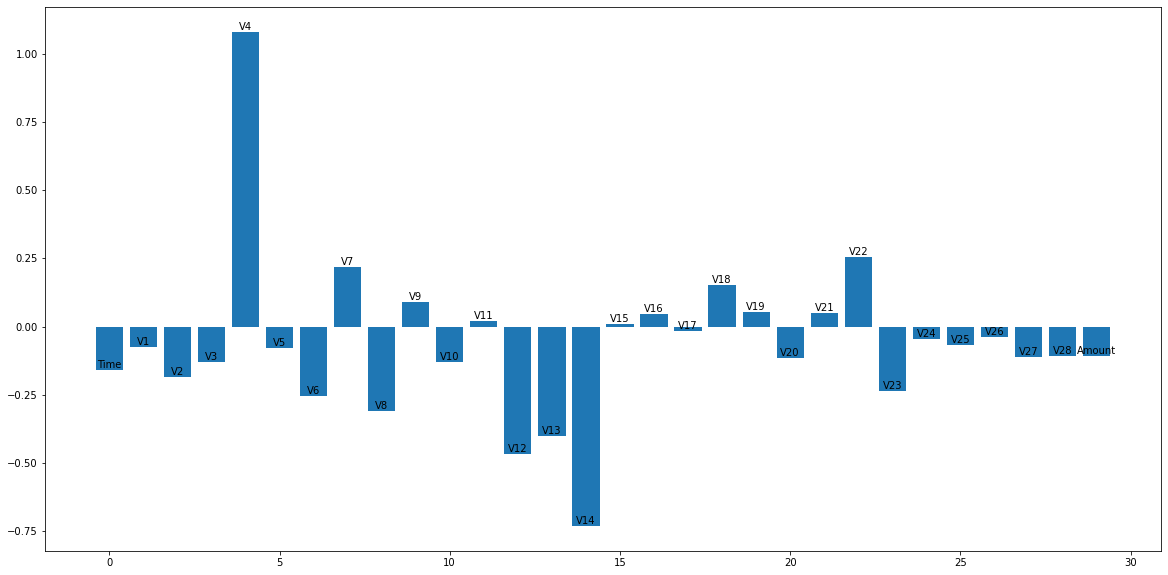

In [8]:
# summarize feature importance
importance = model_logr.coef_[0]

total = 0
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    # use total in next cell
    total = total + abs(v)
# plot feature importance
plt.figure(figsize=(20,10))
plt.bar([x for x in range(len(importance))], importance)

y = 0
col_names = df.columns

for i, v in enumerate(importance):
    plt.annotate(str(col_names[y]), xy=(i, v), ha='center', va='bottom')
    y = y + 1
plt.show()



Above is a plot of the coefficients for each feature. The coefficient shows the effect of a one unit change in the associated feature. For example V1 has a coefficient of 0.43898 and if the value of V1 were 0.5 then then effect for V1 would be 0.21949 (=0.43898 * 0.5).
<br><br>
If I wanted to try to improve my model I could calculate the average magnitude of the coefficients and keep the features with a coefficient that are greater than the average.
I could also only keep any 'n' number of features with the highest coefficients and see how my model performs.
<br><br>
#### **Below I have noted the average magnitude of the coefficients and the features I would keep and re-train the model with.

In [9]:
print('The average magnitude of the coefficients for the features is:', round(total/len(importance), 4))
# Improve model by keeping only the features with a coefficient greater than the average magnitude of all the coefficients
for i,v in enumerate(importance):
    if abs(v) > (total/len(importance)):
        print('Feature: %0d, Score: %.5f' % (i,v))

The average magnitude of the coefficients for the features is: 0.1917
Feature: 4, Score: 1.08124
Feature: 6, Score: -0.25493
Feature: 7, Score: 0.21866
Feature: 8, Score: -0.30836
Feature: 12, Score: -0.46950
Feature: 13, Score: -0.40343
Feature: 14, Score: -0.73250
Feature: 22, Score: 0.25442
Feature: 23, Score: -0.23488


Now I want to perform principal component analysis so I can reduce the number of features to 2 and plot a decision boundary.

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled) # Using X_Scaled defined at the beginning which is the scaled features
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Class
0,0.402715,-2.541743,0
1,-0.403568,-2.062967,0
2,1.862229,-2.566381,0
3,0.300546,-1.788176,0
4,-0.011684,-1.470753,0


In [34]:
# Random Undersample
PC_rus, y_rus2 = rus.fit_resample(principalDf, finalDf['Class'])

print(Counter(y_rus))

PC_rus_train, PC_rus_test, y_rus2_train, y_rus2_test = train_test_split(PC_rus, y_rus2, test_size=0.20)

Counter({0: 473, 1: 473})


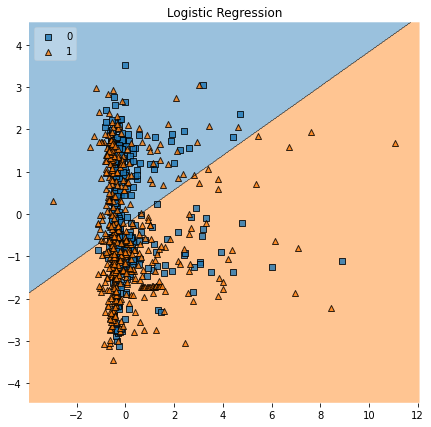

In [35]:
from mlxtend.plotting import plot_decision_regions

logr.fit(PC_rus, y_rus2)
fig = plot_decision_regions(X=PC_rus.values, y=y_rus2.values, clf=logr, legend=2)
plt.title('Logistic Regression')
plt.show()

Now that I have plotted the decision boundary for a random sample, I want to check the decision boundary for the entire dataset. My prediction was that the model will most likely predict not fraudulent for all transactions because that is the majority class and my intuition was correct.

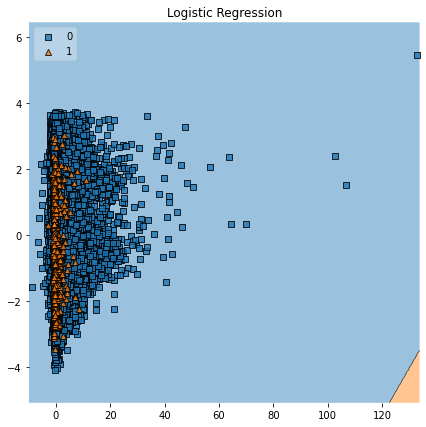

In [27]:
logr.fit(principalDf, finalDf['Class'])
fig = plot_decision_regions(X=principalDf.values, y=finalDf['Class'].values, clf=logr, legend=2)
plt.title('Logistic Regression')
plt.show()